# Laptop Price Prediction

## importing all neccesary libaries

In [558]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                                                               
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')


In [559]:
df=pd.read_csv(r'H:\Odin\PYTHON\practice_pandas\Dataset\laptop.csv') # read the Dataset and Create a Dataframe
df.tail() #displaying last 5 rows of dataset


,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


## DATA UNDERSTANDING AND EXPLORATION

### DATA STRUCTURE 

In [560]:
df.shape # shape 

(1303, 13)

In [561]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [562]:
# exploring columns
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [563]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [564]:
# removing unnecessary columns
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [565]:
# unique values for each cat feature
cat=df.select_dtypes(include='object')
for i in cat:
    print(i , df[i].unique())
    print(i,df[i].nunique())

Company ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' nan 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Company 19
TypeName ['Ultrabook' 'Notebook' nan 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']
TypeName 6
Inches ['13.3' '15.6' '15.4' '14' '12' nan '17.3' '13.5' '12.5' '13' '18.4'
 '13.9' '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17'
 '15' '14.1' '11.3' '10.1']
Inches 25
ScreenResolution ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080' nan
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'Touchscreen 2256x1504' 'Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel 1366x768' 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 '1600

In [566]:
# checking for missing values
df.isna().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

## Data Preprocessing

### Handling Missing values in dataset


In [567]:
# Handling Missing values in dataset
df[df['Price'].isna()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [568]:
# dropping all the NULL values 
df.dropna(inplace=True)

In [569]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [570]:
# checking for duplicate values
df.duplicated().sum()

29

In [571]:
df[df.duplicated(keep='last')] 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1172,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1261,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1262,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1263,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1264,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1265,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1266,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [572]:
df.drop_duplicates(inplace=True) # dropping all the duplicate values


In [573]:
df.duplicated().sum() 

0

In [574]:
cat=df.select_dtypes(include='object')
index=[]
for i,r in df.iterrows():
    for j in cat:
          if  '?' in r[j]:
             print(i,j) 
             index.append(i)
print(index)

208 Weight
476 Inches
770 Memory
[208, 476, 770]


## Feature Engineering

In [575]:
df['Ram']=df['Ram'].apply(lambda x:str(x)[:-2]) #extracting only numeric values 
df['Weight']=df['Weight'].apply(lambda x : str(x)[:-2])

In [576]:
df['Ram'].unique()

array(['8', '16', '4', '2', '12', '64', '6', '32', '24', '1'],
      dtype=object)

### Converting cat feature to numeric

In [577]:
df['Ram'] = df['Ram'].astype(str).astype(int) 
df['Weight'] =pd.to_numeric(df['Weight'], errors ='coerce') 
df['Inches'] =pd.to_numeric(df['Inches'], errors ='coerce') 


In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1243 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1243 non-null   float64
 10  Price             1244 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 111.8+ KB


In [579]:
df.isna().sum()

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64

In [580]:
# feature engineering on memory 
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [581]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [582]:
# splitting the memory into 2 columns
df['Memory_size']=df['Memory'].apply(lambda x :x.split(' ')[0])

df['Memory_type']=df['Memory'].apply(lambda x : ' '.join(x.split()[1:2]))


In [583]:
df['Memory_size'].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '64GB', '32GB', '2TB',
       '1.0TB', '16GB', '180GB', '?', '240GB', '8GB', '508GB'],
      dtype=object)

In [584]:
df['Memory_type'].unique()

array(['SSD', 'Flash', 'HDD', 'Hybrid', ''], dtype=object)

In [585]:
df['Memory_type'].replace('',np.nan,inplace=True)

In [586]:
# df['Memory_size'] =pd.to_numeric(df['Memory_size'], errors ='coerce') 


In [587]:
def memory(name):
    if 'GB' in name:
        return int(name.replace('GB',''))
    elif '?' in name:
        return np.nan
    else:
        return float(name.replace('TB',''))*float(1000)

In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1243 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1243 non-null   float64
 10  Price             1244 non-null   float64
 11  Memory_size       1244 non-null   object 
 12  Memory_type       1243 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 131.2+ KB


In [589]:
df['Memory_size']

0       128GB
1       128GB
2       256GB
3       512GB
4       256GB
        ...  
1269    500GB
1270    128GB
1271    512GB
1272     64GB
1273      1TB
Name: Memory_size, Length: 1244, dtype: object

In [590]:
df['Memory_size']=df['Memory_size'].apply(memory)

In [591]:
df['Memory_size'].unique()

array([ 128.,  256.,  512.,  500., 1000.,   64.,   32., 2000.,   16.,
        180.,   nan,  240.,    8.,  508.])

In [592]:
# checking for null values in df
df.isna().sum()

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              1
Price               0
Memory_size         1
Memory_type         1
dtype: int64

In [593]:
df['Width']=df['ScreenResolution'].apply(lambda x : (x.split()[-1].split('x')[0]))
df['Height']=df['ScreenResolution'].apply(lambda x : (x.split()[-1].split('x')[1]))

In [594]:
df['Height']=df['Height'].astype('int')
df['Width']=df['Width'].astype('int')

In [595]:
df['ppi']=((df['Width']**2)+(df['Height']**2)**(1/2))/df['Inches']

In [596]:
df['ppi']=df['ppi'].astype('float')


In [597]:
df['Touch']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)


In [598]:
df['cpu_name']=df['Cpu'].apply(lambda x:' '.join(x.split()[:3]))

In [599]:
def cpuu(name):
    if 'i5' in name or 'i7' in name or 'i3' in name:
        return name
    elif name.split()[0] == 'Intel':
        return name.split()[0]
    else:
        return f'AMB'
df['cpu_brand']=df['cpu_name'].apply(cpuu)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Memory_size,Memory_type,Width,Height,ppi,Touch,IPS,cpu_name,cpu_brand
1054,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.20,120093.12,1000.0,SSD,3200,1800,770060.150376,1,0,Intel Core i7,Intel Core i7
580,Mediacom,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4,32GB SSD,Intel HD Graphics 500,Windows 10,1.45,20725.92,32.0,SSD,1920,1080,263391.428571,0,1,Intel Celeron Quad,Intel
187,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,No OS,2.40,41505.12,256.0,SSD,1920,1080,236376.923077,0,1,Intel Core i5,Intel Core i5
732,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series A9-9420 3GHz,6,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.10,34632.00,128.0,SSD,1920,1080,236376.923077,0,0,AMD A9-Series A9-9420,AMB
1078,Lenovo,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,28771.20,500.0,HDD,1366,768,119661.794872,0,0,Intel Core i5,Intel Core i5


In [600]:
df['Gpu_brand']=df['Gpu'].apply(lambda x :x.split()[0])

In [601]:
# Drop all unnecessary columns
df.drop(columns=['ScreenResolution','Inches','Width','Height','Gpu','Cpu','Memory'],inplace=True)

In [602]:
df.drop(columns=['cpu_name'],inplace=True)

In [603]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'Memory_size',
       'Memory_type', 'ppi', 'Touch', 'IPS', 'cpu_brand', 'Gpu_brand'],
      dtype='object')

In [604]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [605]:
def opsys(name):
    if 'Windows' in name:
        return f'Windows'
    elif 'Mac' in name or 'mac' in name:
        return f'Mac'
    elif 'Linux' in name:
        return name
    else:
        return f'Chrome/No Os'
df['OpSys']=df['OpSys'].apply(opsys)

In [606]:
df.sample(4)

,Company,TypeName,Ram,OpSys,Weight,Price,Memory_size,Memory_type,ppi,Touch,IPS,cpu_brand,Gpu_brand
1181,Lenovo,Ultrabook,6,Windows,1.54,44275.68,256.0,SSD,236376.923077,0,0,Intel Core i7,Nvidia
824,Lenovo,Ultrabook,8,Windows,1.13,99900.00,256.0,Flash,263391.428571,0,1,Intel Core i5,Intel
1022,HP,Notebook,8,Windows,1.11,61218.72,256.0,SSD,277254.135338,0,1,Intel Core i5,Intel
463,Lenovo,Notebook,8,Chrome/No Os,1.50,42570.72,512.0,SSD,263391.428571,0,1,Intel Core i7,AMD


In [607]:
df.shape

(1244, 13)

## Data Visualization

In [608]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'Memory_size',
       'Memory_type', 'ppi', 'Touch', 'IPS', 'cpu_brand', 'Gpu_brand'],
      dtype='object')

<Axes: xlabel='Price', ylabel='Company'>

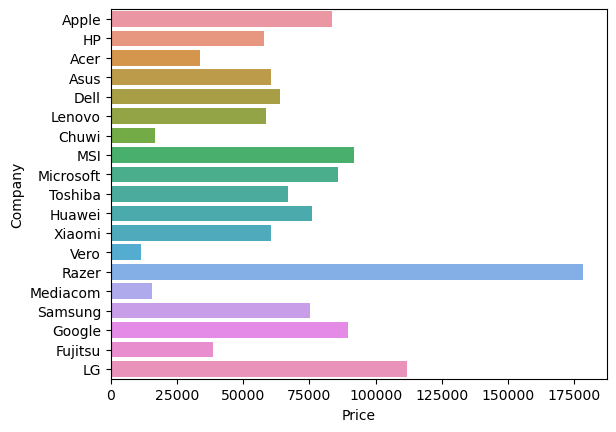

In [609]:
sns.barplot(y=df['Company'],x=df['Price'],ci=None)

# X.ticksrotation()

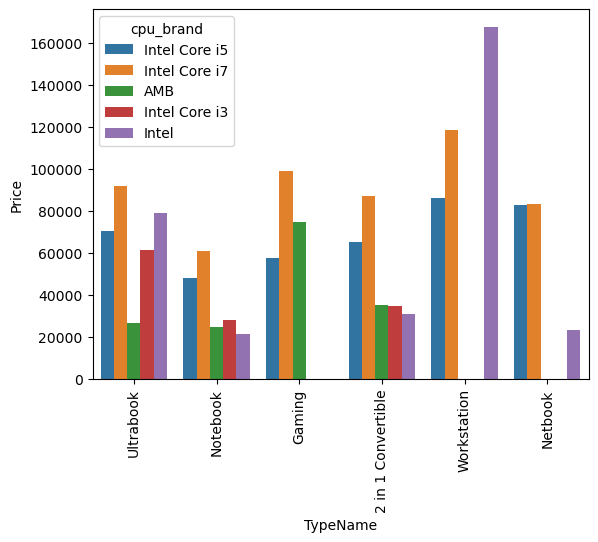

In [610]:
sns.barplot(x=df['TypeName'],y=df['Price'],hue=df['cpu_brand'],ci=None)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Price', ylabel='OpSys'>

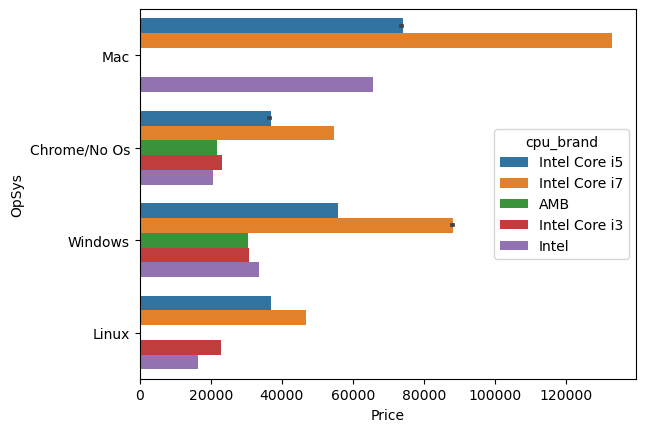

In [611]:
sns.barplot(y=df['OpSys'],x=df['Price'],hue=df['cpu_brand'],ci=True)

In [612]:
df.groupby(['OpSys'])['Price'].mean()

OpSys
Chrome/No Os    31152.429574
Linux           33182.494232
Mac             83340.499886
Windows         64109.506444
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='OpSys'>

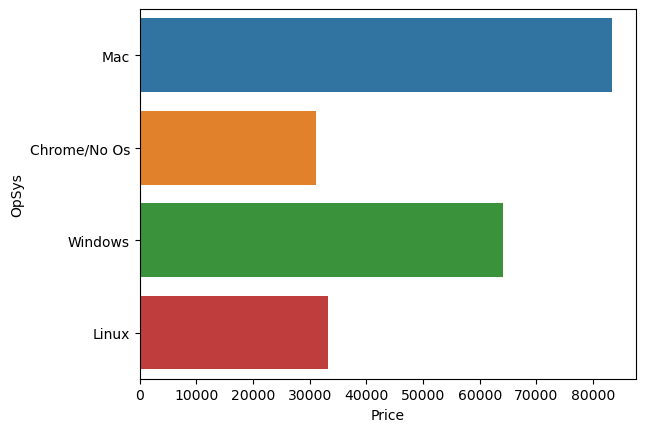

In [613]:
sns.barplot(y=df['OpSys'],x=df['Price'],ci=None)

<Axes: xlabel='Price', ylabel='cpu_brand'>

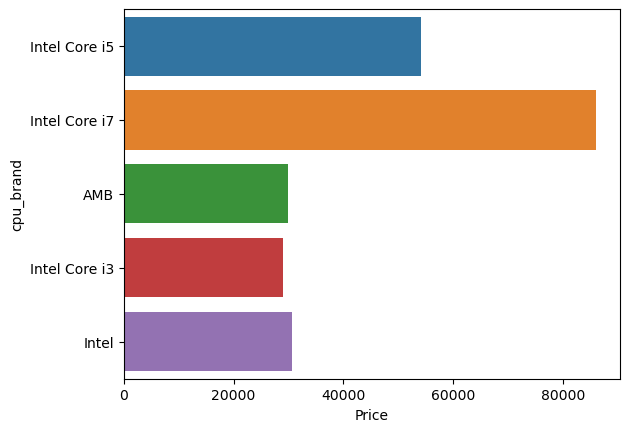

In [614]:
sns.barplot(y=df['cpu_brand'],x=df['Price'],ci=None)

### lapi with No Touch Screen is being sold much

<Axes: xlabel='Touch', ylabel='count'>

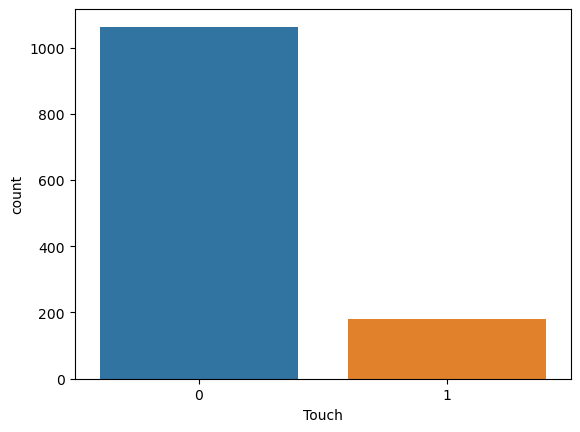

In [615]:
sns.countplot(x=df['Touch'],data=df)
# plt.xticks(rotation='vertical')

### lapi with No IPS is being sold much

<Axes: xlabel='IPS', ylabel='count'>

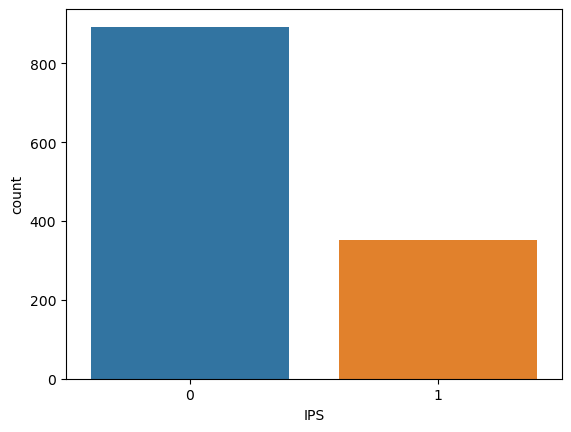

In [616]:
sns.countplot(x=df['IPS'],data=df)

In [617]:
df['Price'].describe()

count      1244.000000
mean      60606.224427
std       37424.636161
min        9270.720000
25%       32655.445200
50%       52693.920000
75%       79813.440000
max      324954.720000
Name: Price, dtype: float64

<Axes: xlabel='Ram', ylabel='Price'>

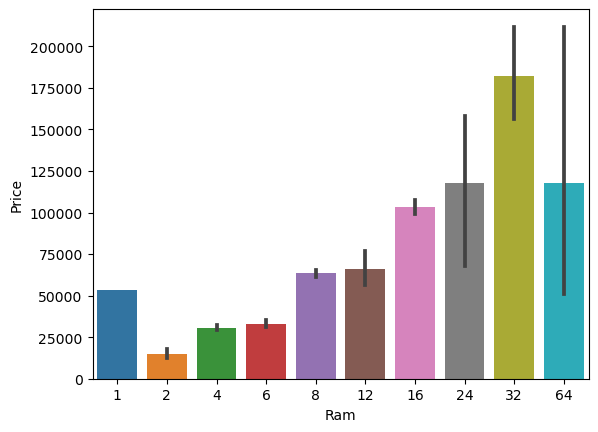

In [618]:
df['Ram'].unique()
sns.barplot(x=df['Ram'],y=df['Price'])
# plt.xticks(labels, labels)
# # pylab.rcParams['xtick.major.pad']='8'
# # plt.xticks(np.arange(0, 11, step=1))  # ticks at 0, 2, 4, ..., 10
# plt.tick_params(axis='x', which='major', labelsize=10)

# plt.tight_layout()
# df['Ram'].value_counts().plot(kind='bar')
# ramm=df['Ram'].value_counts().reset_index(name='Count')
# sns.scatterplot(x=ramm['Ram'],y=ramm['Count'])
# ramm

<Axes: xlabel='Ram', ylabel='Count'>

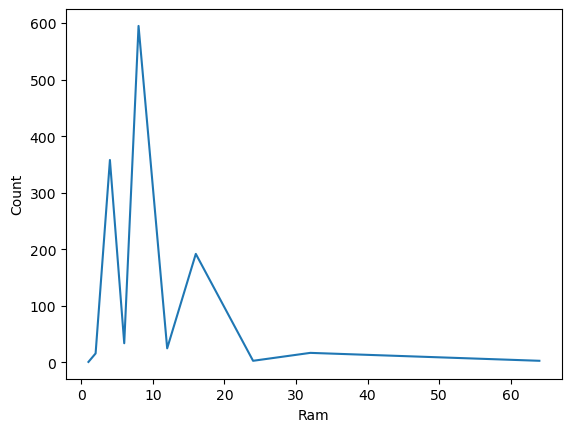

In [619]:
sns.lineplot(x=ramm['Ram'],y=ramm['Count'])


In [621]:
# check the corr 
df.corr(numeric_only=True)['Price']

Ram            0.681922
Weight         0.176362
Price          1.000000
Memory_size   -0.125331
ppi            0.475824
Touch          0.186393
IPS            0.252956
Name: Price, dtype: float64

In [623]:
df.shape

(1244, 13)

<Axes: xlabel='Price', ylabel='Count'>

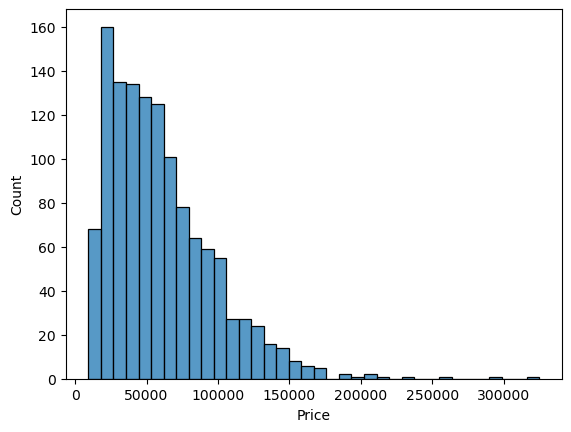

In [624]:
sns.histplot(x=df['Price']) # Price is right skewed

In [625]:
df['Price'].skew()
df['Price']=np.log(df['Price'])
# sns.histplot(x=df['Price']) # Price is right skewed

In [626]:
df.isna().sum()

Company        0
TypeName       0
Ram            0
OpSys          0
Weight         1
Price          0
Memory_size    1
Memory_type    1
ppi            1
Touch          0
IPS            0
cpu_brand      0
Gpu_brand      0
dtype: int64

In [627]:
# df.dropna(inplace=True)

### Model Training

In [628]:
X=df.drop(columns=['Price'])

In [629]:
y=df['Price']

### Deploying all the sklearn libaries

In [630]:
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline,make_pipeline 
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor 

### Spitting Train and test data for model training

In [631]:
X_train, X_test, y_train, y_test = train_test_split(X, 
													y, 
													test_size = 0.2, random_state = 42) 


In [632]:
cat=X.select_dtypes(include='object').columns.tolist()
num=X.select_dtypes(exclude='object').columns.tolist()
num=num[:-2]
num

['Ram', 'Weight', 'Memory_size', 'ppi']

### Column Transformer for Imputation,Scaling,OneHotEncoder

In [633]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False,drop='first')),
    

])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

# Bundle preprocessing for numerical and categorical data


In [634]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num),
        ('cat', categorical_transformer, cat)
    ])

In [635]:
model=LinearRegression()

In [636]:
pipe=Pipeline([
    ("step1",preprocessor),
    ('step2',model)
])

In [637]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight',
                                                   'Memory_size', 'ppi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Memory_type',
                                                   'cpu_brand',
                                                   'Gpu_brand'])])),
                ('step2', LinearRegression())])

In [638]:
y_predict_linear=pipe.predict(X_test)

### Model Evaluation

In [639]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_predict_linear)
print(np.sqrt(mse)) # root mean squared error
print(r2_score(y_test,y_predict_linear))

0.27651359891796917
0.7831559222975285


In [640]:
r2_score(y_test,y_predict_linear)

0.7831559222975285

### K fold cross validation

In [641]:
from sklearn.model_selection import train_test_split, cross_val_score 

scores = cross_val_score(pipe, X, y, scoring='r2', cv=5, n_jobs=-1)

In [642]:
pipe=Pipeline([
    ("step1",preprocessor),
    ('step2',model)
])

In [643]:
# # Evaluate the model using K-Fold cross-validation
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(estimator=pipe, X_train, y_train, cv=kf)


In [644]:
# cv_scores

In [645]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoosting=GradientBoostingRegressor()

In [646]:
%%capture
pip install xgboost


In [649]:
from xgboost import XGBRegressor
XGBRegressor=XGBRegressor()


In [652]:
models=[RandomForestRegressor(max_samples=0.75,n_estimators=100),
        LinearRegression(),
        GradientBoosting,XGBRegressor]

In [651]:
for i in range(len(models)):
    # print(models[i])
    pipe=Pipeline([
    ("step1",preprocessor),
    ('step2',models[i])
        ])
    pipe.fit(X_train,y_train)
    y_predict_t=pipe.predict(X_train)
    y_predict=pipe.predict(X_test)
    print(models[i])
    mse_t=mean_squared_error(y_train,y_predict_t)
    mse=mean_squared_error(y_test,y_predict_linear)
    print('MSE',mse)
    print('training error RMSE',np.sqrt(mse_t)) # root mean squared error
    print('testing error RMSE',np.sqrt(mse)) # root mean squared error

    print('r2',r2_score(y_test,y_predict))
    print('-'*30)

RandomForestRegressor(max_samples=0.75)
MSE 0.07645977038656751
training error RMSE 0.11023443718367107
testing error RMSE 0.27651359891796917
r2 0.8461219720788038
------------------------------
LinearRegression()
MSE 0.07645977038656751
training error RMSE 0.26667788807233594
testing error RMSE 0.27651359891796917
r2 0.7831559222975285
------------------------------
GradientBoostingRegressor()
MSE 0.07645977038656751
training error RMSE 0.19345733405094112
testing error RMSE 0.27651359891796917
r2 0.8425641467021258
------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshol

### XGBRegressor Hyperparameter Tuning

In [653]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'random_state':[42]
}


In [654]:
from xgboost import XGBRegressor
XGBRegressor=XGBRegressor()

In [655]:
grid_search = GridSearchCV(XGBRegressor, param_grid, cv=5,scoring='r2')


In [656]:
pipe_Xgradient_grid=Pipeline([
    ('step1',preprocessor),
    
    ('step2',grid_search),
])

In [657]:
pipe_Xgradient_grid.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight',
                                                   'Memory_size', 'ppi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys'...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                              param_grid={'learning_rate': [0.1, 0.2],
                                          'max_depth': [3, 5, 7],
                                          'random_state': [42],
                                          'subsample': [0.5, 0.7, 1]},
                              scoring='r2'))])

In [658]:
y_Xgradient=pipe_Xgradient_grid.predict(X_test)
# y_Xgradient

In [659]:
mse=mean_squared_error(y_test,y_Xgradient)
print(mse) #0.038552737977463024
print('RMSE',np.sqrt(mse)) # root mean squared error - 0.1963485115234211
print('R2_score',r2_score(y_test,y_Xgradient)) #0.8829628211803406
# print('score', grid_search.score(X_train,y_train))

0.047325283771997344
RMSE 0.2175437513972703
R2_score 0.8657829148627764


In [660]:
print('XGBRegressor Hyperparameter Tuning')
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)
grid_search.best_estimator_


XGBRegressor Hyperparameter Tuning
Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'random_state': 42, 'subsample': 0.5}
Best score:  0.8778298011956343
Best estimator:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Using hyper parameter tuning in xgboost r2 increase to 0.8778298011956343

In [661]:
# grid_search.best_estimator_.predict(X_test)

In [662]:
w='2400x1600'
width=int(w.split('x')[0])
height=int(w.split('x')[1])
Inches=1.4
width
height
P=((width**2)+(height**2)**(1/2))/Inches
P

4115428.571428572

### Deployment of application using gradio

In [674]:
# gradio application
def predicting_price(Company,TypeName,Ram,Weight,cpu_brand,Gpu_brand,OpSys,Touch,IPS,Memory_size,Memory_type,Inches,Resolution):
  # print(Company,TypeName,Ram,Weight,cpu_brand,Gpu_brand,OpSys,Touch,IPS,Memory_size,Memory_type,Inches,Resolution)
  width=int(Resolution.split('x')[0])
  height=int(Resolution.split('x')[1])
  ppi=0
  ppi=((width**2)+(height**2)**(1/2))/Inches
  if Touch == 'Yes':
      Touch=1
  else:
      Touch=0
  if IPS == 'Yes':
      IPS = 1
  else:
      IPS = 0
  # print(pipe_Xgradient_grid.predict(inputs)[0])

  # print(Company,TypeName,Ram,Weight,cpu_brand,Gpu_brand,OpSys,Touch,IPS,Memory_size,Memory_type,ppi)
  inputs=pd.DataFrame([[Company,TypeName,Ram,Weight,cpu_brand,Gpu_brand,OpSys,Touch,IPS,Memory_size,Memory_type,ppi]],
  columns=['Company','TypeName','Ram','Weight','cpu_brand','Gpu_brand','OpSys','Touch','IPS','Memory_size','Memory_type','ppi'])
  price=np.exp(pipe_Xgradient_grid.predict(inputs)[0])
  
  return price



In [675]:
predicting_price("Apple","Ultrabook",8,1.37,"Intel Core i5","Intel","Mac"	,'No',	'Yes'	,256.0	,"SSD",13.5,'2560x1600')


88912.39

## Real-time Predictions



In [665]:
%%capture
pip install gradio

In [666]:
import gradio as gr

In [667]:
c_v=df['Company'].unique().tolist()
t=df['TypeName'].unique().tolist()
r=X['Ram'].unique().tolist()
W=['1.37', '1.34', '1.86', '1.83', '2.10', '2.04', '1.30', '1.60',
       '2.20', '0.92', '1.22', '2.50', '1.62', '1.91', '2.30', '1.35',
       '1.88', '1.89', '1.65', '2.71', '1.20', '1.44', '2.80', '2.00',
       '2.65', '2.77', '3.20', '1.49', '2.40', '2.13', '2.43', '1.70',
       '1.40', '1.80', '1.90', '3.00', '1.25', '2.70', '2.02', '1.63',
       '1.96', '1.21', '2.45', '1.50', '2.62', '1.38', '1.58', '1.85',
       '1.23', '2.16', '2.36', '7.20', '2.05', '1.32', '1.75', '0.97',
       '2.56', '1.48', '1.74', '1.10', '1.56', '2.03', '1.05', '5.40',
       '4.40', '1.29', '1.95', '2.06', '1.12', '3.49', '3.35', '2.23',
       '2.90', '4.42', '2.69', '2.37', '4.70', '3.60', '2.08', '4.30',
       '1.68', '1.41', '4.14', '2.18', '2.24', '2.67', '4.10', '2.14',
       '1.36', '2.25', '2.15', '2.19', '2.54', '3.42', '5.80', '1.28',
       '2.33', '1.45', '2.79', '8.23', '1.26', '1.84', '0.00', '2.60',
       '2.26', '3.25', '1.59', '1.13', '1.42', '1.78', '1.15', '1.27',
       '1.43', '2.31', '1.16', '1.64', '2.17', '1.47', '3.78', '1.79',
       '0.91', '1.99', '4.33', '1.93', '1.87', '2.63', '3.40', '3.14',
       '1.94', '1.24', '4.60', '4.50', '8.40', '2.73', '1.39', '2.29',
       '2.59', '2.94', '11.10', '1.14', '3.80', '6.20', '3.31', '1.09',
       '3.21', '1.19', '1.98', '1.17', '4.36', '1.71', '2.32', '4.20',
       '1.55', '0.81', '1.18', '2.72', '1.31', '3.74', '1.76', '1.54',
       '2.83', '2.07', '2.38', '3.58', '1.08', '0.98', '2.75', '2.99',
       '1.11', '2.09', '4.00', '0.99', '0.69', '3.52', '2.21', '3.30',
       '2.34']
cpu_brand=X['cpu_brand'].unique().tolist()
Gpu_brand=df['Gpu_brand'].unique().tolist()
OpSys=df['OpSys'].unique().tolist()
Memory_size=df['Memory_size'].unique().tolist()
Memory_type=df['Memory_type'].unique().tolist()

In [668]:
Company=gr.Dropdown(label='Company',choices=c_v)
TypeName=gr.Dropdown(label='Type',choices=t)
Ram=gr.Dropdown(label='Ram',choices=r)
Weight=gr.Dropdown(label='Weight',choices=W)
cpu_brand=gr.Dropdown(label='cpu_brand',choices=cpu_brand)
# Cpu_ghz=gr.Dropdown(label='Cpu_ghz',choices=Cpu_ghz)
Gpu_brand=gr.Dropdown(label='Gpu_brand',choices=Gpu_brand)
OpSys=gr.Dropdown(label='OperatingSys',choices=OpSys)
Touch=gr.Dropdown(label='Touch',choices=['Yes','No'])
IPS=gr.Dropdown(label='IPS',choices=['Yes','No'])
Memory_size=gr.Dropdown(label='Memory_size',choices=Memory_size)
Memory_type=gr.Dropdown(label='Memory_type',choices=Memory_type)
Touch=gr.Dropdown(label='Touch',choices=['Yes','No'])
IPS=gr.Dropdown(label='IPS',choices=['Yes','No'])
Inches=gr.Dropdown(label='Inches',choices=[13.3, 15.6, 15.4, 14. , 12. , 17.3, 13.5, 12.5, 13. , 18.4, 13.9,
       11.6, 25.6, 35.6, 12.3, 27.3, 24. , 33.5, 31.6, 17. , 15. , 14.1,
       11.3, 10.1])
Resolution=gr.Dropdown(label='Resolution',choices=['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '2256x1504', '3840x2160', '2160x1440',
       '1600x900', '2560x1440', '2736x1824', '2400x1600', '1920x1200'])

In [669]:
demo=gr.Interface(fn=predicting_price,
                  inputs=[Company,TypeName,Ram,Weight,cpu_brand,Gpu_brand,OpSys,Touch,IPS,Memory_size,Memory_type,Inches,Resolution],
                  outputs=gr.Textbox(label="Predicted Price"))

In [670]:
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7867

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
